In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df= pd.read_excel("Height-Width.xlsx")
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


# Data Analysis

In [4]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [5]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Visualization

Text(0, 0.5, 'Weight')

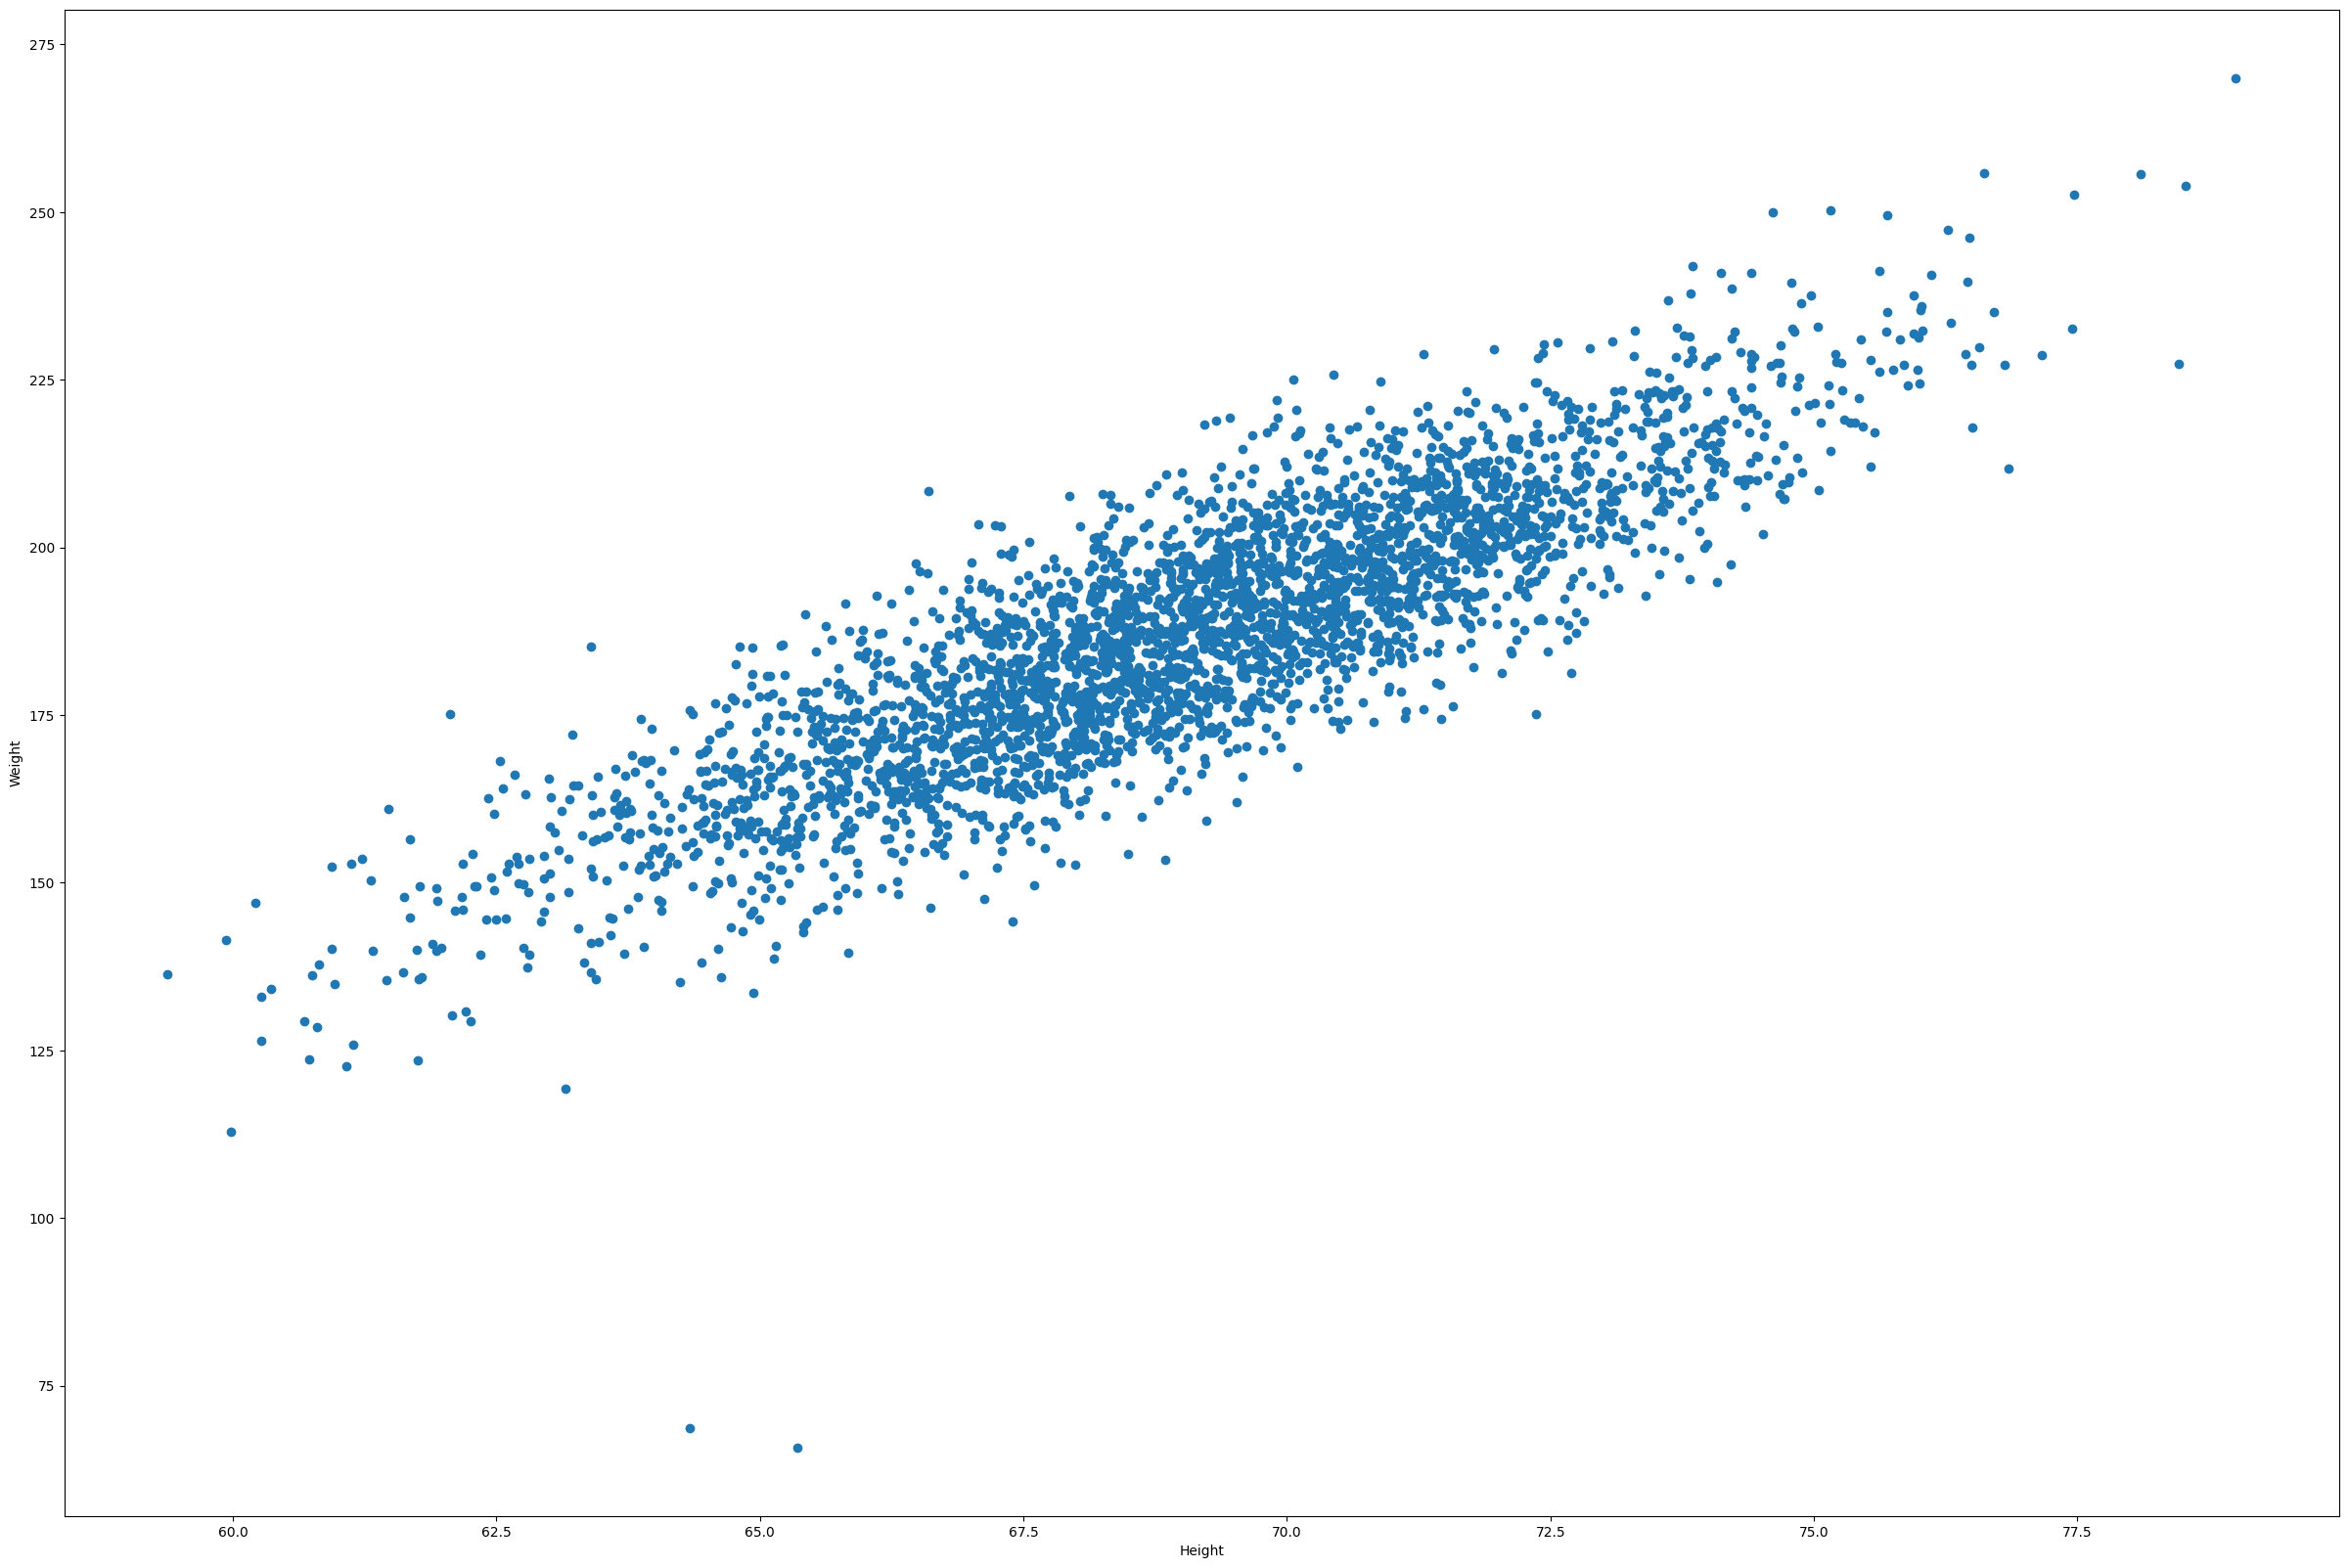

In [6]:
plt.figure(figsize=(30,20))
plt.scatter(df.Height, df.Weight)
plt.xlabel("Height")
plt.ylabel("Weight")

In [7]:
x= df[["Height"]]
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [8]:
y = df["Weight"]
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split as tts

In [10]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.3,random_state=5)


In [11]:
xtrain

,Height
3466,67.172828
828,66.653234
2234,65.077902
3245,65.035786
1298,69.702258
...,...
3190,69.509852
3046,65.239635
1725,68.031172
2254,71.410754


In [12]:
xtest

,Height
2730,63.914541
2008,66.416414
840,69.016067
2635,71.948486
1721,71.196587
...,...
1932,69.685483
3464,73.005906
543,72.131990
907,68.893418


In [13]:
ytrain 

3466    181.886241
828     160.147436
2234    165.313807
3245    168.618676
1298    177.149091
           ...    
3190    193.223197
3046    158.619761
1725    176.665353
2254    189.204802
2915    192.100036
Name: Weight, Length: 2450, dtype: float64

In [14]:
ytest

2730    167.842391
2008    193.601091
840     196.763907
2635    208.204435
1721    191.683842
           ...    
1932    181.936701
3464    193.086474
543     212.157276
907     172.654238
3469    227.824916
Name: Weight, Length: 1051, dtype: float64

# Linear Regression 

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [18]:
m= reg.coef_
m

array([6.00809929])

In [19]:
c = reg.intercept_

In [20]:
c

-227.77595602223423

In [21]:
y= m*70.171479+c
y

array([193.82125679])

In [22]:
reg.predict([[70.171479]])

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([193.82125679])

In [23]:
pred = reg.predict(xtest)
pred

array([156.22895255, 171.26045447, 186.87942774, ..., 205.60020285,
       186.14253731, 219.24585226])

In [24]:
df["Predicted Result"]= reg.predict(x)

In [25]:
df

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.904254
1,68.781904,162.310473,185.472553
2,74.110105,212.740856,217.484915
3,71.730978,220.042470,203.190884
4,69.881796,206.349801,192.080812
...,...,...,...
3496,69.296830,185.649086,188.566279
3497,70.542201,210.198845,196.048594
3498,73.912549,202.429960,216.297978
3499,67.396021,144.277671,177.146028


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
mse = mean_squared_error(ytest, pred)
mse

102.60138482843213

In [28]:
mae = mean_absolute_error(ytest, pred)
mae

8.061150778858023

# Best Fit Line

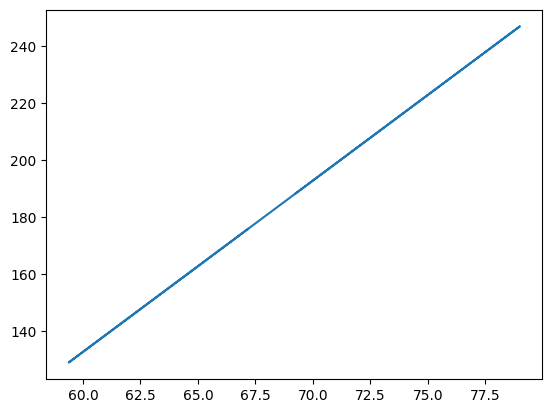

In [29]:
plt.plot(xtrain, reg.predict(xtrain))

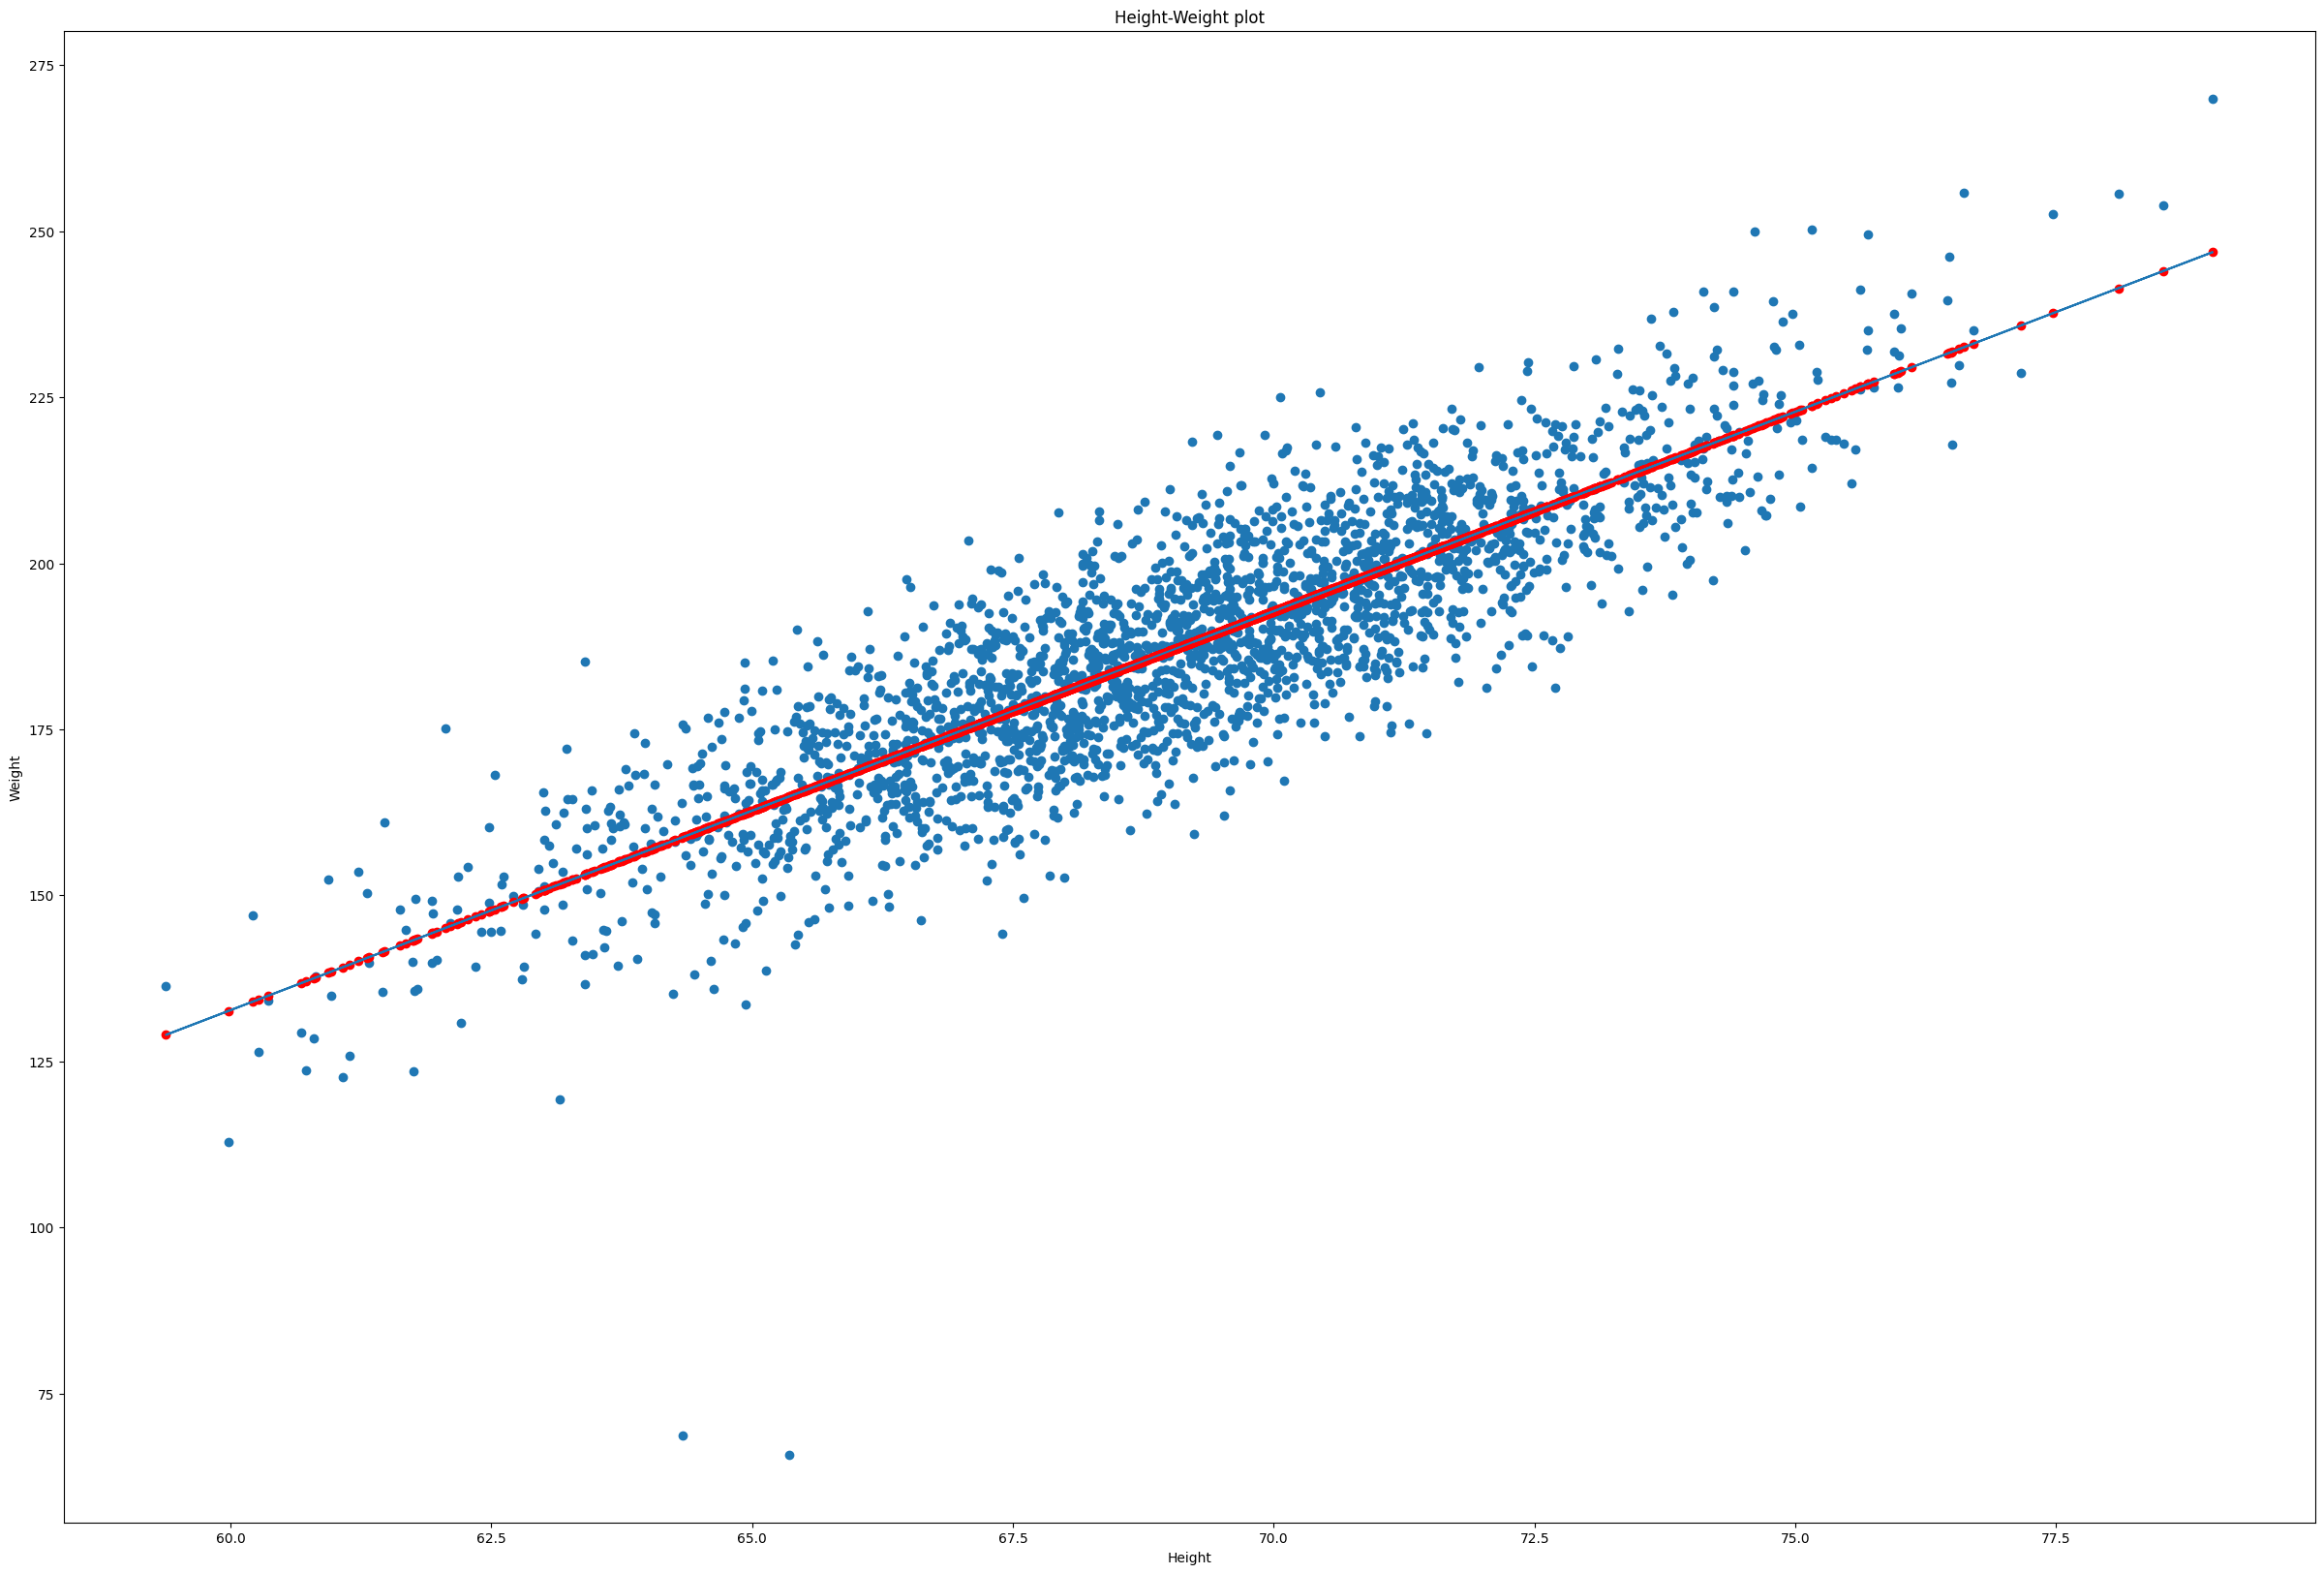

In [30]:
plt.figure(figsize=(30,20))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain, reg.predict(xtrain))
plt.scatter(xtrain, reg.predict(xtrain), color="Red")

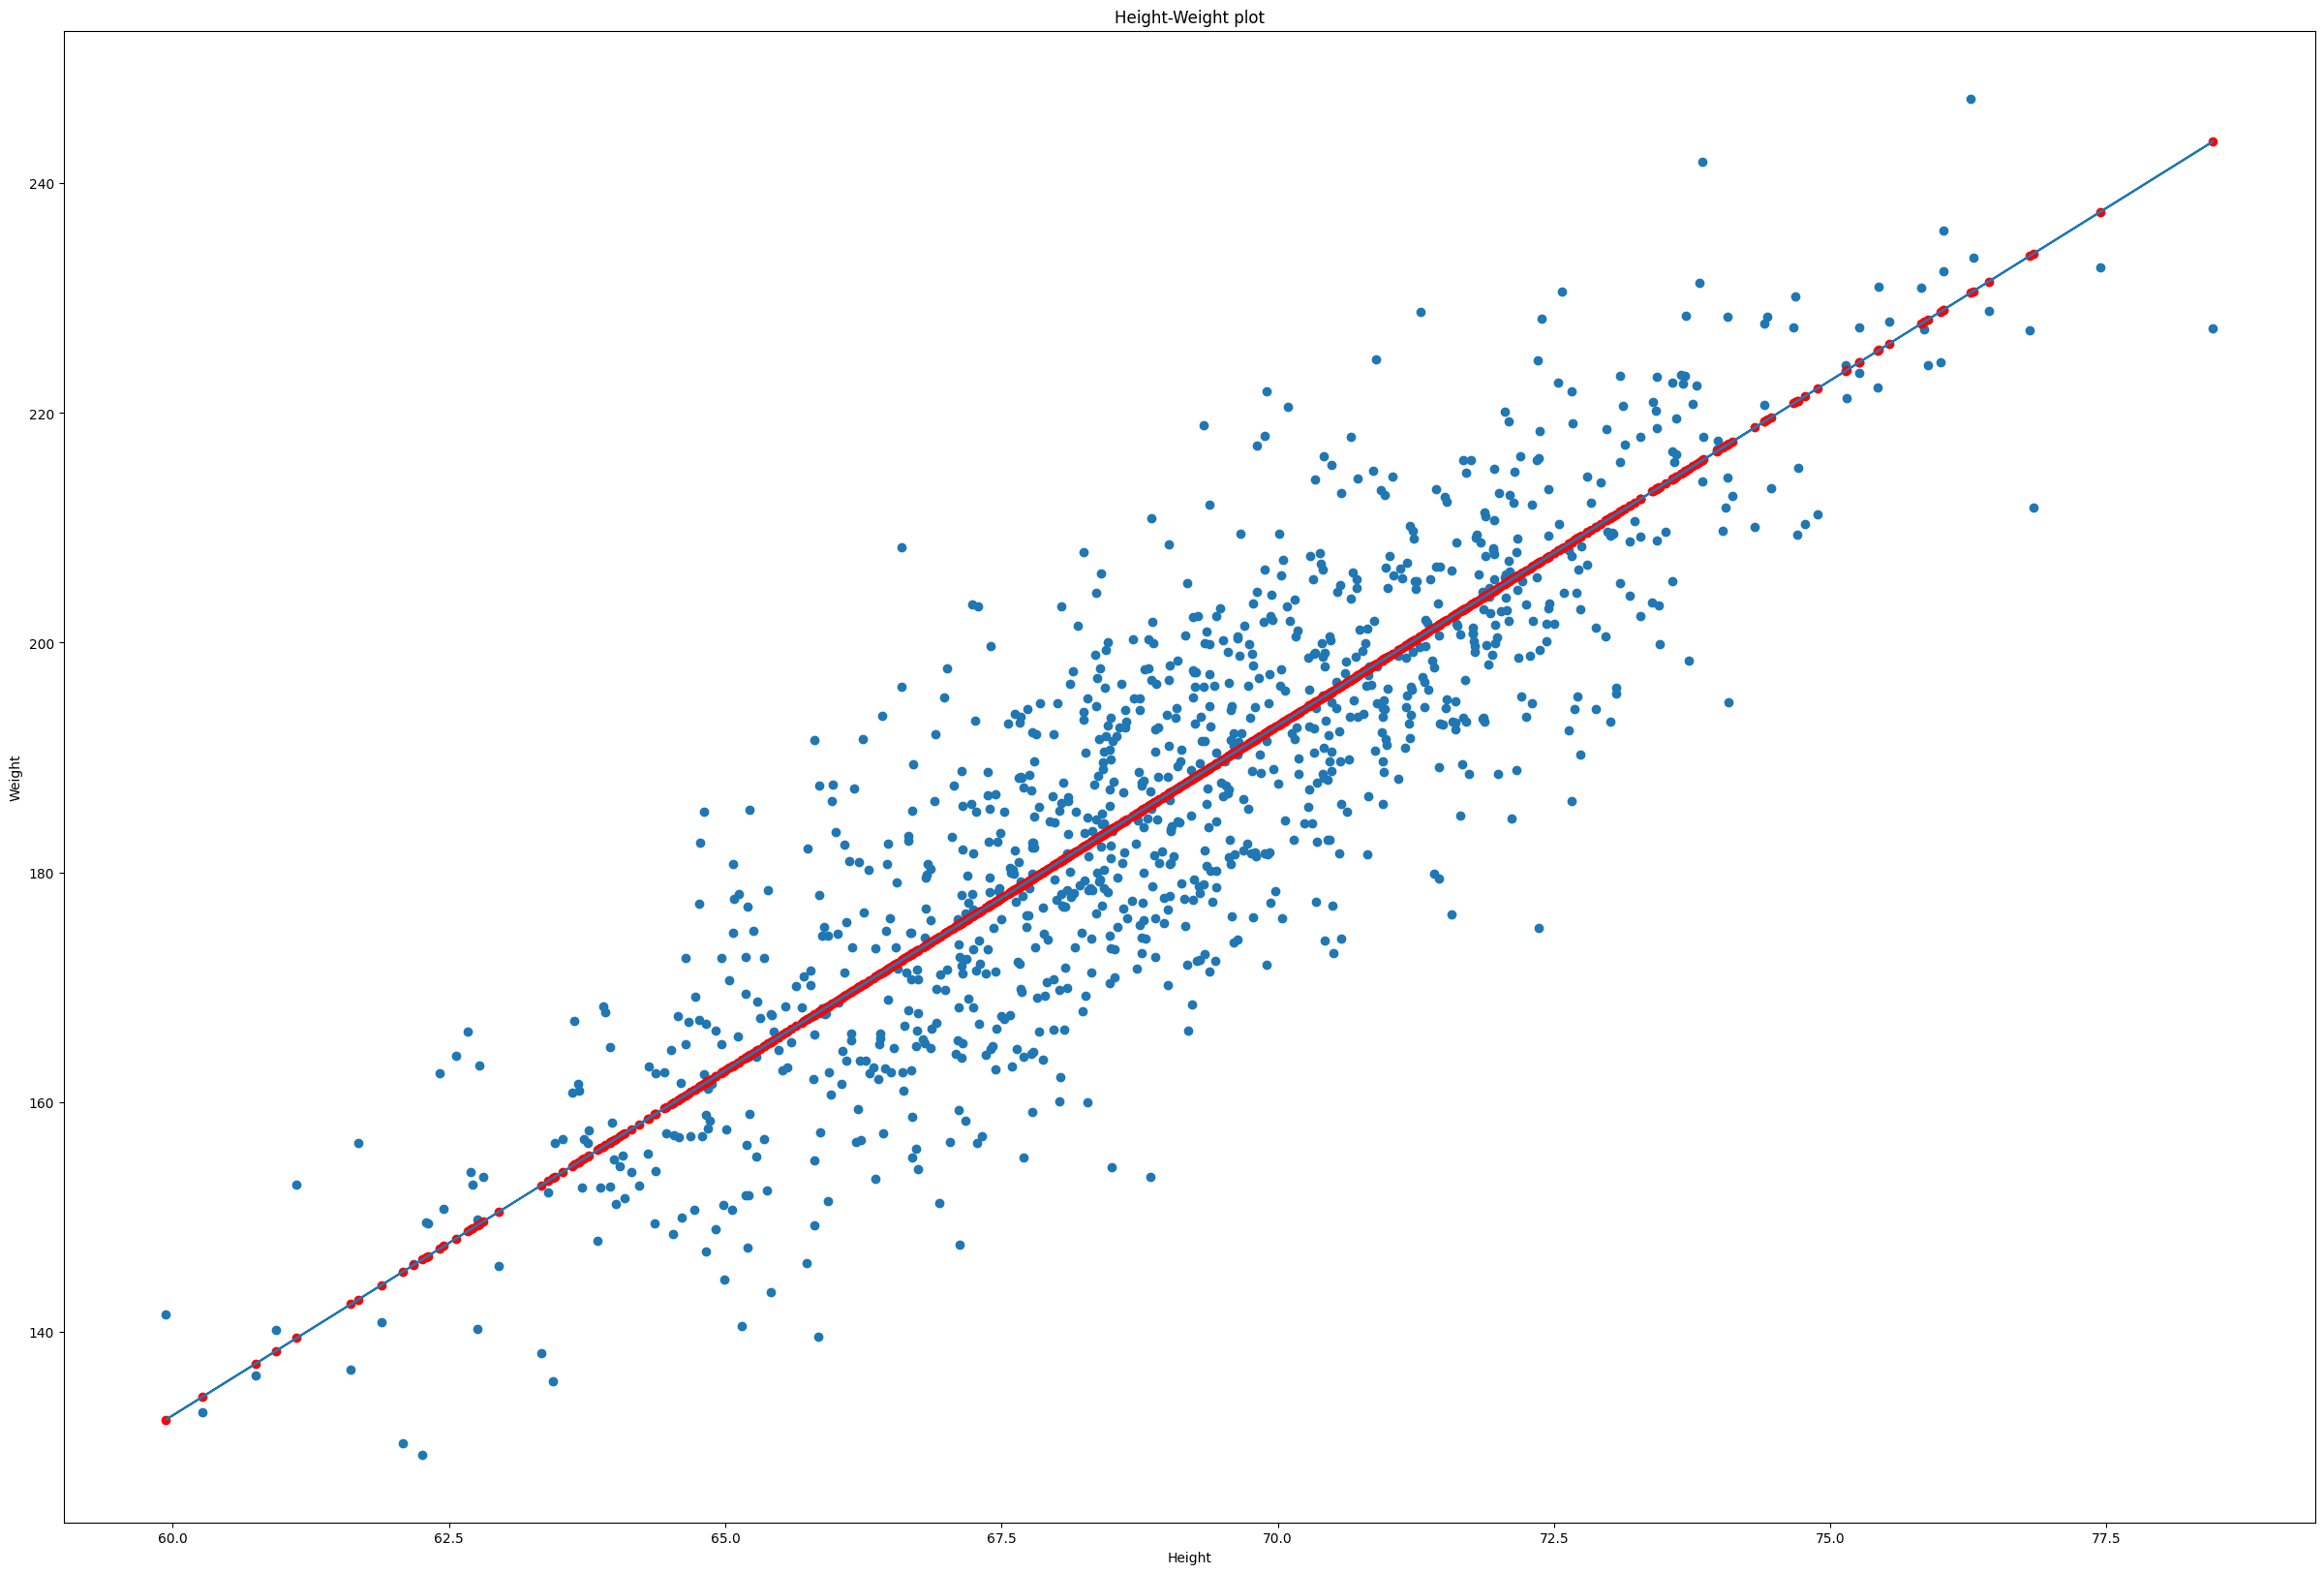

In [31]:
plt.figure(figsize=(30,20))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight plot")
plt.scatter(xtest,ytest)
plt.plot(xtest, reg.predict(xtest))
plt.scatter(xtest, reg.predict(xtest), color="Red")

In [32]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.7302328605746943

In [34]:
xtest.to_csv("xtest.csv")
xtest

,Height
2730,63.914541
2008,66.416414
840,69.016067
2635,71.948486
1721,71.196587
...,...
1932,69.685483
3464,73.005906
543,72.131990
907,68.893418


# Save Model

In [35]:
import pickle as pk
import joblib as jb

In [36]:
pk.dump(reg, open("first", "wb"))

In [37]:
reg2 = pk.load(open("first", "rb"))

In [38]:
reg2.predict([[70.171479]])

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([193.82125679])

In [39]:
jb.dump(reg, "second")

['second']